In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['figure.figsize'] = (12,5)
plt.rcParams['axes.unicode_minus'] = False

# 1. 통계분석

### 1.1
- 종속변수인 Chance_of_Admit(입학허가확률)과 독립변수(GRE, TOEFL, Univ_Rating, SOP, LOR, CGPA)에 대해 피어슨 상관계수를 이용한 상관관계 분석 수행.
- 그래를 활용, 분석 결과를 설명하시오

<Axes: xlabel='Pearson 상관계수'>

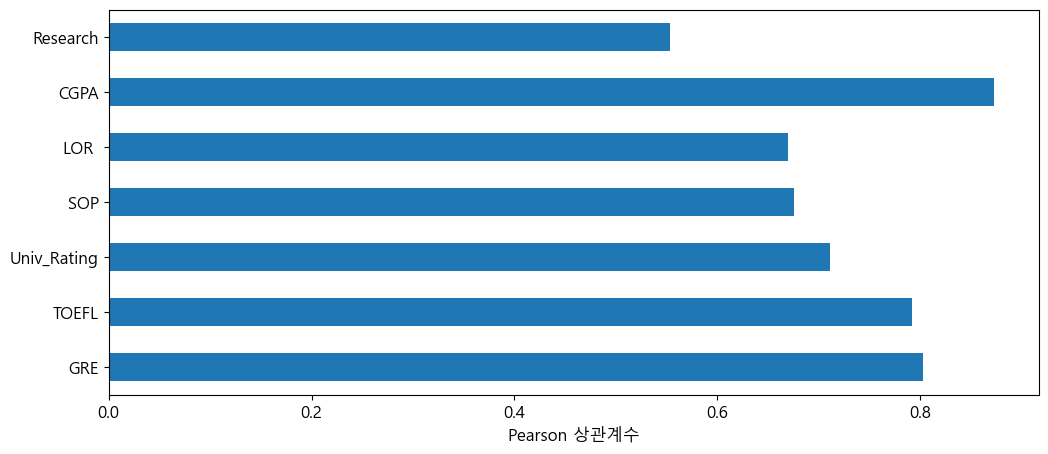

In [2]:
admit = pd.read_csv('Admission.csv')
admit_feat = admit.drop(['Chance_of_Admit'], axis=1)
df_corr = admit_feat.corrwith(admit.Chance_of_Admit, method='pearson')
df_corr.plot(kind='barh', xlabel='Pearson 상관계수')

# 각 독립변수 GRE, TOEFL, Univ_Rating, SOP, LOR, CGPA의 종속변수 Chance_of_Admit 과의 Pearson 상관관계를 아래와 같이 바그래프로 비교하였다.
# 모든 독립변수는 종속변수와 양의 상의 관계를 갖는 것으로 나타났으며, 특히 CGPA가 매우 상관관계가 높은 것으로 나타났다. 상대적으로 상관관계가 가장 약한 독립변수는 Research로 볼수 있다.

### 1.2
- 독립변수(GRE, TOEFL, Univ_Rating, SOP, LOR, CGPA, Research)가 Chance_of_Admit에 영향을 미치는지 알아보는 회귀분석을 단계적 선택법을 사용하여 수행하고 결과를 해석하시오.

In [3]:
import statsmodels.api as sm
from itertools import combinations

def stepwise_method_AIC(X, y):
    result = pd.DataFrame()
    feature_combis = []
    for i in range(1, len(X.columns)+1):
        feature_combis += list(combinations(X.columns, i))
    feature_combis.reverse()

    for j, combi in enumerate(feature_combis):
        X_ = X.filter(combi)
        X_ = sm.add_constant(X_)
        
        model = sm.OLS(y, X_)
        fitted = model.fit()
        n = fitted.nobs
        p = fitted.df_model

        if j==0:
            MSE_full = fitted.mse_resid #Full 모델의 MSE
        
        result.loc[j, 'feature_combi'] = ', '.join(list(fitted.params.keys()))
        result.loc[j, 'AIC'] = fitted.aic
        result.loc[j, 'BIC'] = fitted.bic
        result.loc[j, 'CP'] = sum((fitted.resid)**2)/MSE_full - (n-2*(p+1))
        result.loc[j, 'adj_R2'] = fitted.rsquared_adj

        result = result.sort_values(by='AIC', ascending=True)
        best = result.iloc[0, 0]
    return best, result


X = admit.drop(['Chance_of_Admit'], axis=1)
y = admit.Chance_of_Admit

best, result = stepwise_method_AIC(X, y)

print('total features : ', X.columns)
print('best features'' set : ', best)
print(result)

# AIC는 가능도(likelihood)에 기초한 값이지만 변수가 증가할수록 불이익을 적용한 값이다. 따라서 가능도가 같다면 적은 수의 특성을 사용하는 모델에 더 좋은 점수를 주도록 설계되었다.
# AIC는 낮을수록 더 좋은 모델인데, AIC가 가장 낮은 점수의 조합은 전체 특성을 모두 사용한 조합이다.

total features :  Index(['GRE', 'TOEFL', 'Univ_Rating', 'SOP', 'LOR ', 'CGPA', 'Research'], dtype='object')
best features set :  const, GRE, TOEFL, LOR , CGPA, Research
                                         feature_combi          AIC  \
19             const, GRE, TOEFL, LOR , CGPA, Research -1061.224621   
4    const, GRE, TOEFL, Univ_Rating, LOR , CGPA, Re... -1060.386155   
3         const, GRE, TOEFL, SOP, LOR , CGPA, Research -1059.283687   
0    const, GRE, TOEFL, Univ_Rating, SOP, LOR , CGP... -1058.746368   
15       const, GRE, Univ_Rating, LOR , CGPA, Research -1055.416599   
..                                                 ...          ...   
104                                   const, SOP, LOR   -714.489786   
124                                 const, Univ_Rating  -701.955757   
123                                         const, SOP  -663.941304   
122                                        const, LOR   -658.194963   
120                                    const, Rese

### 1.3
- 단계적 선택법을 사용해 변수를 선택한 후 새롭게 생성한 회귀모형에 대한 잔차분석을 수행하고, 그래프를 활용하여 결과를 해석하시오.

In [4]:
#-----------------------------------------------------------------
# 모델 생성 및 적합
#-----------------------------------------------------------------
import statsmodels.api as sm

y = admit.Chance_of_Admit
X = admit[['GRE', 'TOEFL','LOR ', 'CGPA', 'Research']]
X = sm.add_constant(X)

model = sm.OLS(y, X)
fitted = model.fit()

fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Chance_of_Admit   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     320.6
Date:                Sun, 31 Aug 2025   Prob (F-statistic):          2.04e-136
Time:                        10:41:14   Log-Likelihood:                 536.61
No. Observations:                 400   AIC:                            -1061.
Df Residuals:                     394   BIC:                            -1037.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2985      0.117    -11.070      0.000      -1.529      -1.068
GRE            0.0018      0.001      2.992      0.003       0.001       0.003
TOEFL          0.0030      0.001      2.847      0.005       0.001       0.005
LOR            0.0228      0.005      4.741      0.000       0.013       0.032
CGPA           0.1210      0.012     10.312      0.000       0.098       0.144
Research       0.0246      0.008      3.103      0.002       0.009       0.040
==============================================================================
Omnibus:                       87.489   Durbin-Watson:                   0.750
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              179.337
Skew:                          -1.157   Prob(JB):                     1.14e-39
Kurtosis:                       5.325   Cond. No.                     1.23e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

1. 정규성 확인 --------------------------------
Jarque-bera : stats 179.337 , p-value 0.000
Skewness -1.157 , Kurtosis 5.325


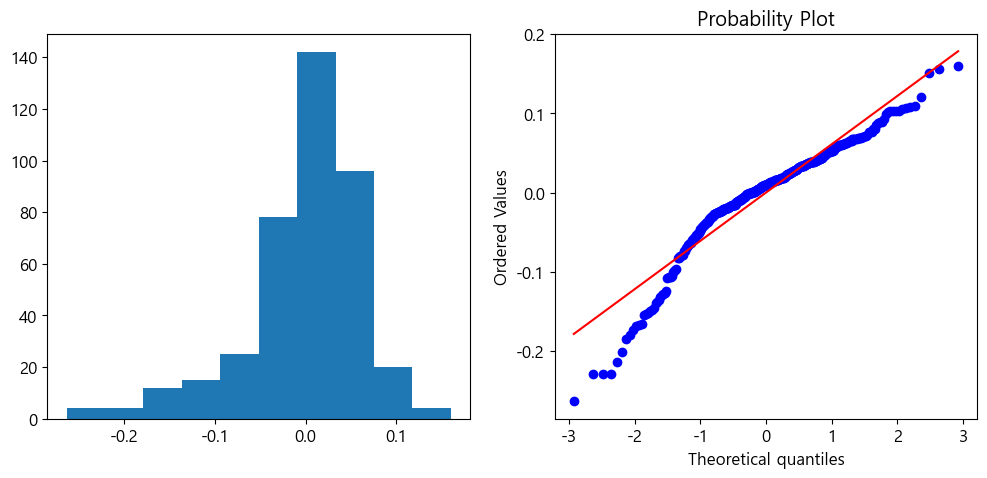

2. 등분산성 확인 --------------------------------


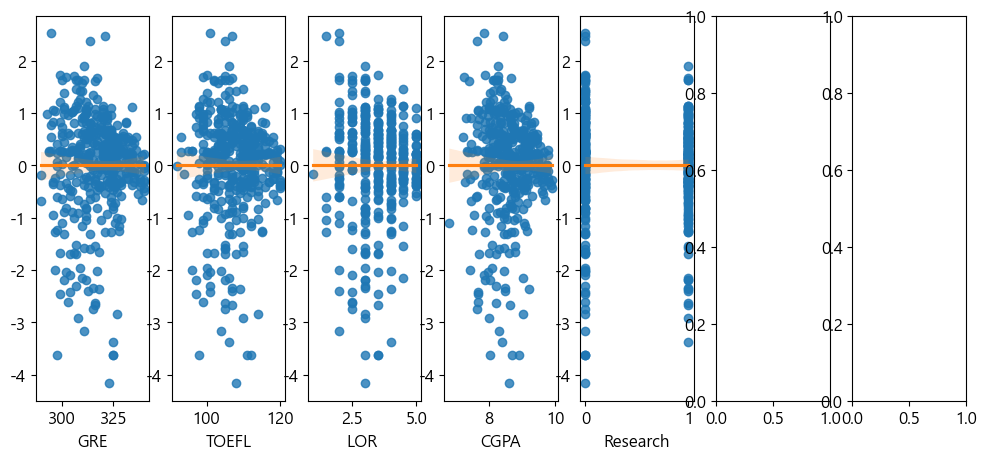

3. 독립성 확인 --------------------------------
durbin-watson stats 0.750


In [5]:
#-----------------------------------------------------------------
# 잔차 분석
#-----------------------------------------------------------------
import seaborn as sns
from scipy.stats import zscore, probplot
from statsmodels.stats.stattools import jarque_bera, durbin_watson

resid = fitted.resid
pred = fitted.fittedvalues
sresid = zscore(resid)

print("1. 정규성 확인 --------------------------------") 
stats, p, skew, kurt = jarque_bera(resid)
print('Jarque-bera : stats {:.3f} , p-value {:.3f}'.format(stats, p))
print('Skewness {:.3f} , Kurtosis {:.3f}'.format(skew, kurt))
# Jarque-bera 통계량이 0.01 유의수준에서 귀무가설이 기각된다. 즉, 정규분포와 차이가 있다.
# 데이터의 형태는 skewness가 -1.16으로 우측으로 다소 치우친 형태이고, kurtosis는 5.344로 다소 퍼진 형태를 보인다.

fig, ax = plt.subplots(1,2)
ax[0].hist(resid)
probplot(resid, plot=ax[1])
plt.show()

print("2. 등분산성 확인 --------------------------------") 
cols = X.columns.to_list()
cols.remove('const')
fig, ax = plt.subplots(1, 7)
for feature, ax in zip(cols, ax.ravel()):
    sns.regplot(x=X[feature], y=sresid, line_kws={"color":'C1'}, ax=ax)
plt.show()
# 각 특성과 잔차 간의 분포를 볼 때 어떤 상관관계 없이 등분산성이 확인된다.

print("3. 독립성 확인 --------------------------------") 
dw = durbin_watson(resid)
print('durbin-watson stats {:.3f}'.format(dw))
# durbin-watson 통게량은 2에 가까울 때 잔차 간 독립이고, 0에 가까우면 양의 상관, 4에 가까우면 음의 상관을 갖는다.
# 통계량이 0.759이므로 0에 가까워 양의 상관이 있다고 볼 수 있다.

# 2. 정형 데이터마이닝

In [6]:
titanic = pd.read_csv("titanic.csv")
titanic.info()

# 범주형 : survived, sex, embarked(결측) 
# 문자형 : name, ticket, cabin(결측)
# 수치형 : pclass, age(결측), sibsp, parch, fare(결측)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   name      1309 non-null   object 
 3   sex       1309 non-null   object 
 4   age       1046 non-null   float64
 5   sibsp     1309 non-null   int64  
 6   parch     1309 non-null   int64  
 7   ticket    1309 non-null   object 
 8   fare      1308 non-null   float64
 9   cabin     295 non-null    object 
 10  embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


### 2.1
- cabin, embarked의 값 중 ""로 처리된 값을 NA로 바꾸고 아래의 테이블을 보고 문자형, 범주형 변수들을 각각 character, factor형으로 변환하시오.
- 수치형 변수가 NA인 값을 중앙값으로 대체하고, 범주형 변수가 NA인 값을 최대값으로 대체하고, age변수를 아래의 표와 같이 구간화하여 age_1이라는 변수를 생성하고 추가하시오.

In [7]:
from sklearn.preprocessing import LabelEncoder

data = titanic.copy()

# ------------------------------------------------------------
# cabin, embarked의 값 중 ""로 처리된 값을 NA로 바꾸고
# ------------------------------------------------------------
data.cabin = titanic.cabin.fillna('NA')
data.embarked = titanic.embarked.fillna('NA')

# ------------------------------------------------------------
# 범주형 변수들을 범주형으로 인코딩
# ------------------------------------------------------------
# 범주형 : survived, sex, embarked(결측) 
sex_order = {"male" : 0, "female" : 1}
data.sex = data.sex.map(sex_order)

embarked_order = {"C" : 1, "Q" : 2, "S" : 3, "NA" : 4}
data.embarked = data.embarked.map(embarked_order)

In [8]:
# ------------------------------------------------------------
# 범주형 변수들의 결측치를 최대값으로 대체
# ------------------------------------------------------------
# 범주형 : survived, sex, embarked(결측) 
data.embarked = data.embarked.apply(lambda x: 3 if x==4 else x)
data.embarked.value_counts()

# ------------------------------------------------------------
# 수치형 변수가 NA인 값을 중앙값으로 대체
# ------------------------------------------------------------
# 수치형 : pclass, age(결측), sibsp, parch, fare(결측)
data.fare = data.fare.fillna(data.fare.median())
data.age = data.age.fillna(data.age.median())

In [9]:
# ------------------------------------------------------------
# age변수를 구간화하여 age_1이라는 변수를 생성
# ------------------------------------------------------------

bin_divider = list(range(0, 100, 10))
bin_vals = list(range(0, 9, 1))

data['age_1'] = pd.cut(x = data.age, bins=bin_divider, labels=bin_vals, include_lowest=True)
data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,age_1
0,1,1,"Allen, Miss. Elisabeth Walton",1,29.00,0,0,24160,211.3375,B5,3,2
1,1,1,"Allison, Master. Hudson Trevor",0,0.92,1,2,113781,151.5500,C22 C26,3,0
2,1,0,"Allison, Miss. Helen Loraine",1,2.00,1,2,113781,151.5500,C22 C26,3,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",0,30.00,1,2,113781,151.5500,C22 C26,3,2
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.00,1,2,113781,151.5500,C22 C26,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",1,14.50,1,0,2665,14.4542,NA,1,1
1305,3,0,"Zabour, Miss. Thamine",1,28.00,1,0,2665,14.4542,NA,1,2
1306,3,0,"Zakarian, Mr. Mapriededer",0,26.50,0,0,2656,7.2250,NA,1,2
1307,3,0,"Zakarian, Mr. Ortin",0,27.00,0,0,2670,7.2250,NA,1,2


### 2.2
- 전처리가 완료된 titatic 데이터를 train:test = 7:3 데이터로 분할하시오.
- train 데이터로 종속변수인 survived를 독립변수 pclass, sex, sibsp, parch, fare, embarked로 지정하여 예측하는 분류모델을 3개 이상 생성하고, test 데이터에 대한 예측값을 csv파일로 각각 제출하시오.

In [10]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression

X = data[['pclass', 'sex', 'sibsp', 'parch', 'fare', 'embarked']]
y = data.survived

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [18]:
# ------------------------------------------------------------
# 로직스틱회귀 적용
# ------------------------------------------------------------
skFold = StratifiedKFold(n_splits=3, shuffle=True)
model_lr = LogisticRegression(max_iter=500)
params_lr = {'C':[0.3, 0.4, 0.5, 0.7], 'solver':['lbfgs', 'liblinear']}
cv = GridSearchCV(model_lr, params_lr, cv=skFold)

cv.fit(X, y)

print('Best scores : {:.3f}'.format(cv.best_score_))
print('Best params : {}'.format(cv.best_params_))

model_lr = LogisticRegression(max_iter=500, C=0.3, solver='liblinear')
model_lr.fit(X_train, y_train)
print('model score : {:.3f}'.format(model_lr.score(X_test, y_test)))

pred_lr = model_lr.predict(X_test)
predprob_lr = model_lr.predict_proba(X_test)

Best scores : 0.788
Best params : {'C': 0.3, 'solver': 'liblinear'}
model score : 0.771


In [19]:
from sklearn.svm import SVC
# ------------------------------------------------------------
# SVM 적용
# ------------------------------------------------------------
skFold = StratifiedKFold(n_splits=3, shuffle=True)
model_svm = SVC()
params_svm = {'C':[0.1, 0.2, 0.3], 'kernel':['rbf','sigmoid', 'poly']}
cv = GridSearchCV(model_svm, params_svm, cv=skFold)

cv.fit(X, y)

print('best score : {:.3f}'.format(cv.best_score_))
print('best param : {}'.format(cv.best_params_))

model_svm = SVC(C=0.2, kernel='rbf',probability=True)
model_svm.fit(X_train, y_train)
print('model score : {:.3f}'.format(model_svm.score(X_test, y_test)))

pred_svm = model_svm.predict(X_test)
predprob_svm = model_svm.predict_proba(X_test)

best score : 0.674
best param : {'C': 0.2, 'kernel': 'rbf'}
model score : 0.689


In [20]:
# ------------------------------------------------------------
# RandomForestClassifier 적용
# ------------------------------------------------------------
from sklearn.ensemble import RandomForestClassifier

skFold = StratifiedKFold(n_splits=3, shuffle=True)
model_rfc = RandomForestClassifier()
param_rfc = {'max_depth':[5, 7, 9], 'n_estimators':[70, 100, 200], 'min_samples_split':[5, 7, 9]}
cv = GridSearchCV(model_rfc, param_rfc, cv=skFold)

cv.fit(X, y)

print('best score : {:.3f}'.format(cv.best_score_))
print('best param : {}'.format(cv.best_params_))

model_rfc = RandomForestClassifier(n_estimators=100, max_depth=7, min_samples_split=5)
model_rfc.fit(X_train, y_train)
print('model score : {:.3f}'.format(model_rfc.score(X_test, y_test)))
      
pred_rfc = model_rfc.predict(X_test)
predprob_rfc = model_rfc.predict_proba(X_test)

best score : 0.801
best param : {'max_depth': 5, 'min_samples_split': 7, 'n_estimators': 100}
model score : 0.802


In [21]:
pred = pd.DataFrame({'LogisticRegression':pred_lr, 'SupportVectorMachine':pred_svm, 'RandomForest':pred_rfc})
pred.to_csv('classifier_predict.csv')

### 2.3
- 생성된 3개의 분류모델에 대해 성과분석을 실시하여 정확도를 비교하여 설명하시오. 또 ROC curve를 그리고 AUC값을 산출하시오.

In [37]:
from sklearn.metrics import roc_curve, auc

# 확률이 몇 %이상이면 양성으로 볼 것인가? 
# 확률 기준값을 낮추면 낮출수록, 양성인데 음성이라고 말하는 False-Postive가 올라가고,
# 확률 기준값을 높이면 높일수록, 음성인데 양성이라고 말하는 False-Negative가 올라갈 것이다.

# 세로축인 TPR은 실제 양성인 것 중 양성 판단의 비율
    # 모델이 잘 분류했다고 가정할 때,
        # 기준을 낮추면 어지간하면 다 양성 판단할 것이므로 비율이 높을 것이고,
        # 기준을 높이면 높일수록 양성인 데 음성보고할 확률이 높아지므로 TPR이 떨어진다.
        # 그런데 잘 분류되었다면 분포 상 높은 확률 쪽에 몰려있을 것이므로 떨어지는 각도가 가파르다.
# 가로축인 FPR은 실제 음성인 것 중 양성 판단의 비율

def plot_roc_curve(ax, y, pred):
    # ROC 커브를 그리기 위해서 roc_curve 함수를 사용한다
    fpr, tpr, _ = roc_curve(y_test, pred)

    # AUC 계산하기
    roc_auc = auc(fpr, tpr)

    ax.plot(fpr, tpr, label='AUC = %0.2f)' % roc_auc)
    ax.plot([0, 1], [0, 1], linestyle='--')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('ROC')
    ax.legend(loc="lower right")

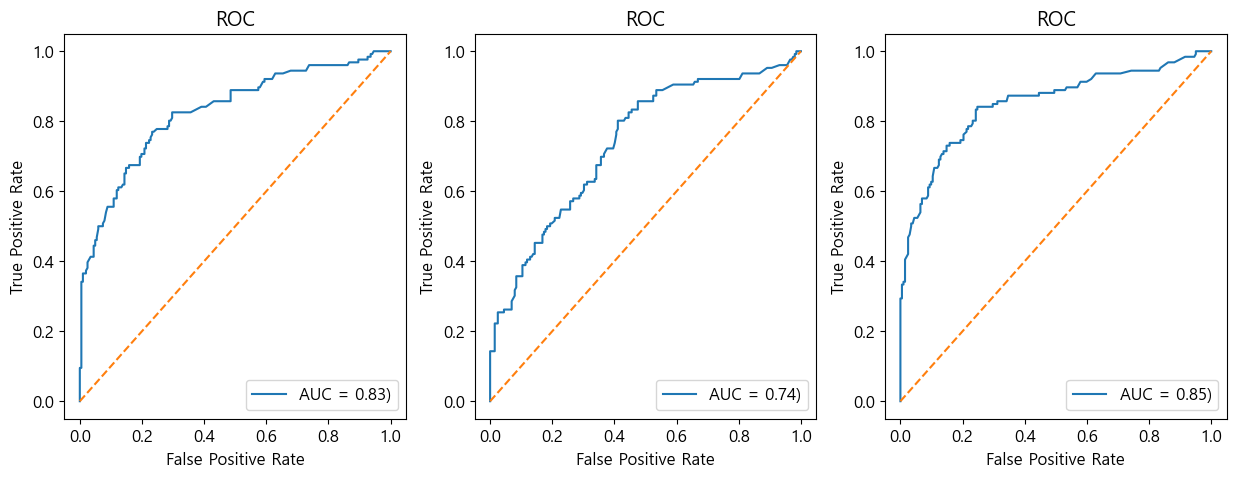

In [38]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

plot_roc_curve(ax[0], y_test, predprob_lr[:,1])
plot_roc_curve(ax[1], y_test, predprob_svm[:,1])
plot_roc_curve(ax[2], y_test, predprob_rfc[:,1])

# 3. 비정형 데이터마이닝

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (12, 5)
plt.rcParams['axes.unicode_minus'] = False

f = open('연설문.txt', encoding='cp949')
adres = f.read()

### 1. 
연설문.txt에서 데이터를 읽어온 후 숫자/특수문자 등을 제거하는 전처리 작업을 수행하시오.

In [ ]:
import re

data = re.sub(r"[^\uAC00-\uD7A3a-zA-Z\s]", ' ', adres)
corpus = data.split()
corpus

### 2. 
전처리된 데이터에서 명사를 추출하고 명사의 출현 빈도를 10위까지 추출하여 막대그래프로 시각화 하시오

In [86]:
# =============================================================
# 방식 1.   CountVectorizer를 써서 빈도 매트릭스를 만들고 sum하는 방식
#           이 방식의 문제는 명사 단위 추출이 안된다는 것
# =============================================================
from sklearn.feature_extraction.text import CountVectorizer

vector = CountVectorizer()
vec_fitted = vector.fit_transform(corpus)

word_list = vector.get_feature_names_out()
count_list = vec_fitted.toarray().sum(axis=0)

df_cv =  pd.DataFrame({'word':word_list, 'count':count_list})
df_cv = df_cv.sort_values(by='count', ascending=False)
df_cv


,word,count
33,국민,8
78,대통령이,6
146,새로운,6
220,위해,4
238,저는,4
...,...,...
117,머리는,1
116,머리,1
115,맞추는,1
114,맞잡고,1


<Axes: xlabel='noun'>

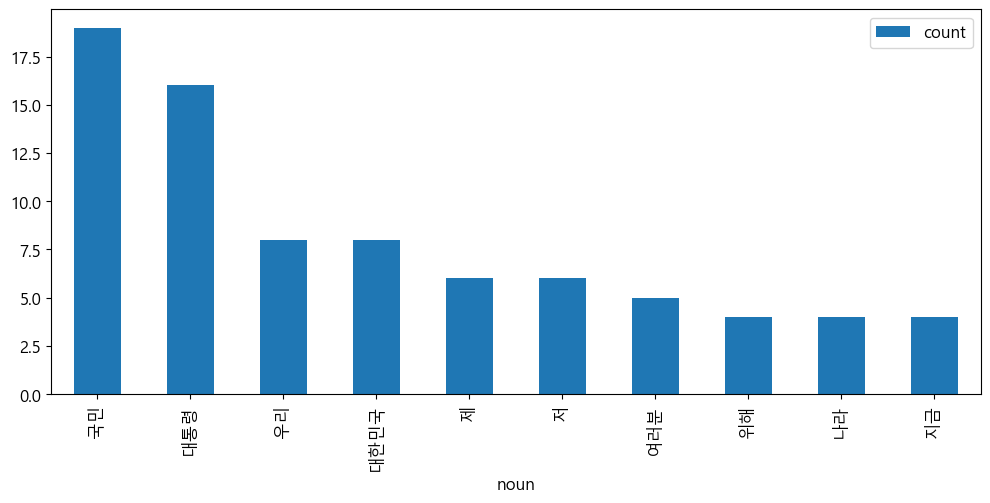

In [91]:
# =============================================================
# 방식 2.   konlpy를 사용하는 방식. 복잡하지만 명사 등 품사별 추출이 된다. 
#           이 방식의 문제는 형용사에 섞인 명사를 잘 식별하지 못한다는 점이다. 
#           '불편'은 명사로 잡지만 '불편한데'의 불편은 명사로 잡지 않는다.
# =============================================================
from konlpy.tag import Okt
from collections import Counter

okt = Okt()
noun = okt.nouns(data)
morph = okt.morphs(data)

noun_count= Counter(noun)
morph_count = Counter(morph)

df_ko = pd.DataFrame({'noun':noun_count.keys(), 'count':noun_count.values()})
df_ko.sort_values(by='count', ascending=False, inplace=True)
df_ko = df_ko.head(10)

df_ko.plot(kind='bar', x='noun', y='count')

### 3. 
전처리된 데이터를 이용하여 워드클라우드를 작성하고 인사이트를 추출하시오.

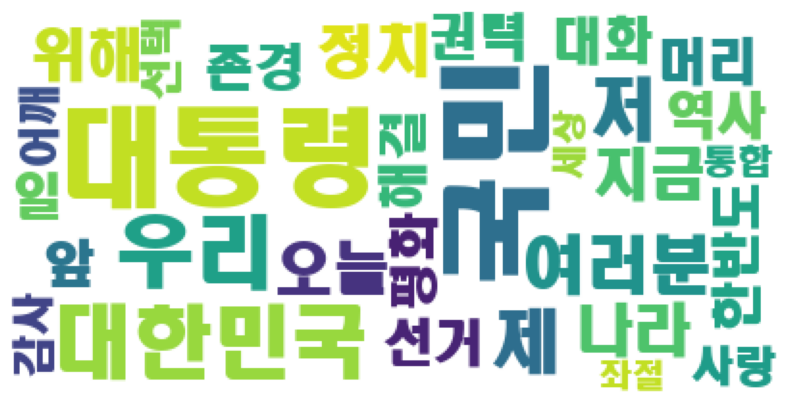

In [100]:
from wordcloud import WordCloud

wc = WordCloud(font_path='C://windows//Fonts//HMKMRHD.ttf', background_color='white', max_font_size=60)
cloud = wc.generate_from_frequencies(dict(noun_count.most_common(30)))

plt.axis('off')
plt.imshow(cloud)
plt.show()